# <center><font color = 'blue'> Capstone Project - Model Buiding and Hyperparameter Tuning</font> <center>

---
This project will go through the following steps to build a Machine Learning model for our chosen dataset:
1. **EDA and Visualization**
2. Feature Engineering, Oversampling and Scaling
3. Model Buiding and Hyperparameter Tuning


# **Introduction**

The cost to obtain a new customer and retain an existing one is not comparable. It helps the business a lot if one can predict who is going to churn so that they can proactively approach the customers, orver better services, and turn their decisions before they leave.

The goal of this project is to build a Machine Learning model to predict customer churn for some credit card service using variables of different types of customer information. 

In this capstone project, I will be using the [Credit Card Customers dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers) which contains about 10K customers information including their age, gender, education level, marital status and much more. 

In this notebook, we will perform Exploratory Data Analysis(EDA) and some visualization to better understand our data.

## Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd

import plotly.offline
sns.set()

import warnings
warnings.filterwarnings("ignore")

## EDA

### Load data

This dataset is obtained from Kaggle(https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).



| Column Names | Description |
| :------------: | :-------:  |
| CLIENTNUM | Client number. Unique identifier for the customer holding the account |
| Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age | Demographic variable - Customer's Age in Years |
| Gender | Demographic variable - M=Male, F=Female |
| Dependent_count | Demographic variable - Number of dependents |
| Education_Level | Demographic variable - Educational Qualification of the account holder |
| Marital_Status | Demographic variable - Married, Single, Divorced, Unknown |
| Income_Category | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > |
| Card_Category | Product Variable - Type of Card (Blue, Silver, Gold, Platinum) |
| Months_on_book | Period of relationship with bank |
| Total_Relationship_Count | Total no. of products held by the customer |
| Months_Inactive_12_mon | No. of months inactive in the last 12 months |
| Contacts_Count_12_mon | No. of Contacts in the last 12 months |
| Credit_Limit | Credit Limit on the Credit Card |
| Total_Revolving_Bal | Total Revolving Balance on the Credit Card |
| Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) |
| Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) |
| Total_Trans_Amt | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |
| Avg_Utilization_Ratio | Average Card Utilization Ratio |
| Naive_Bayes_Classifier... * 2 | They can be ignored |


In [2]:
# Load data from CSV file
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
# Shape 
df.shape

(10127, 23)

In [5]:
# Total Data
total_data = df.shape[0]*df.shape[1]
total_data

232921

In [6]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

### Drop columns 

* Column "CLIENTNUM" and the 2 Naive_Bayes columns will be dropped.

* Column "CLIENTNUM" contains client number which is not useful for building our ML model. 
* The 2 Naive_Bayes columns are said to be ignored from the original database.

In [7]:
# drop unuseful columns
df.drop(['CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1, inplace=True)

### Missing Values

In [8]:
# Total number of missing values
missing_values = df.isnull().sum().sum()
missing_values

0

### Duplicated Values

In [9]:
df.duplicated().sum()

0

### Duplicated Columns

In [10]:
df.loc[:,df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10127 rows x 0 columns]

* **Observation**:
This dataset doesn't have any missing values, duplicated values, or duplicated columns.

## Data Exploration

### The target variable

In [11]:
print ("target data format: {}".format(type(df.Attrition_Flag)))
print ("target variable shape: {}".format(df.Attrition_Flag.shape)) #1-D Array
print ("number of target classes: {}".format(df.Attrition_Flag.nunique())) #How many unique values are in that array
print ("target variable unique values: {}".format(np.unique(df.Attrition_Flag, return_index=False)))

df.Attrition_Flag[:5]

target data format: <class 'pandas.core.series.Series'>
target variable shape: (10127,)
number of target classes: 2
target variable unique values: ['Attrited Customer' 'Existing Customer']


0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

In [12]:
# change the column name of target
df = df.rename(columns={'Attrition_Flag': 'Churn'})


# change the value name of target
target_map = {'Existing Customer': 0,
             'Attrited Customer': 1}

df['Churn'] = df['Churn'].map(target_map)

In [13]:
target = df['Churn'].to_frame()
target.head()

Churn
0      0
1      0
2      0
3      0
4      0

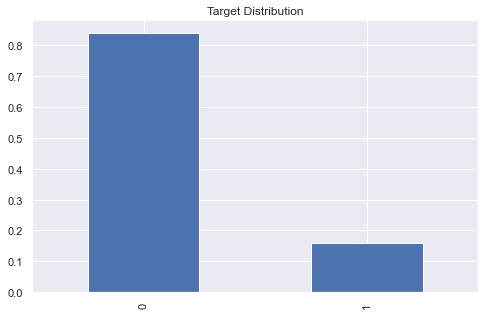

In [14]:
# Visualizing the target distribution
(target['Churn'].value_counts()/target.size).plot(kind='bar', title='Target Distribution', figsize=(8,5));

In [15]:
target['Churn'].value_counts(normalize=True)

0    0.83934
1    0.16066
Name: Churn, dtype: float64

**Observation:**
* 16% of the customers churned.
* 84% of the customers didn't churn.

## Visualization

### Wordcloud for categorical values

In [19]:
# use all text in our data
df_cat = df.select_dtypes(exclude=[np.number])
df_cat

Gender Education_Level Marital_Status Income_Category Card_Category
0          M     High School        Married     $60K - $80K          Blue
1          F        Graduate         Single  Less than $40K          Blue
2          M        Graduate        Married    $80K - $120K          Blue
3          F     High School        Unknown  Less than $40K          Blue
4          M      Uneducated        Married     $60K - $80K          Blue
...      ...             ...            ...             ...           ...
10122      M        Graduate         Single     $40K - $60K          Blue
10123      M         Unknown       Divorced     $40K - $60K          Blue
10124      F     High School        Married  Less than $40K          Blue
10125      M        Graduate        Unknown     $40K - $60K          Blue
10126      F        Graduate        Married  Less than $40K        Silver

[10127 rows x 5 columns]

In [40]:
# Prepare the words for wordcloud
words = list()
for x in df_cat.columns:
    text = ' '.join(df_cat[x])
    words.append(text)

words = ''.join(words)

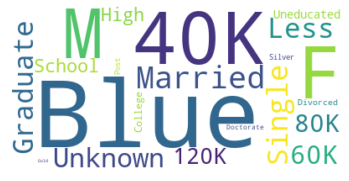

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, background_color = 'white').generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation:** 
* Most customers have blue cards.
* The amount of single and married customers are similar.
* Most of them have salaries around 40K.
* They have similar numbers of female and male customers.
* Many of them graduated.

### Let's take a quick look at the ditribution of the numeric features

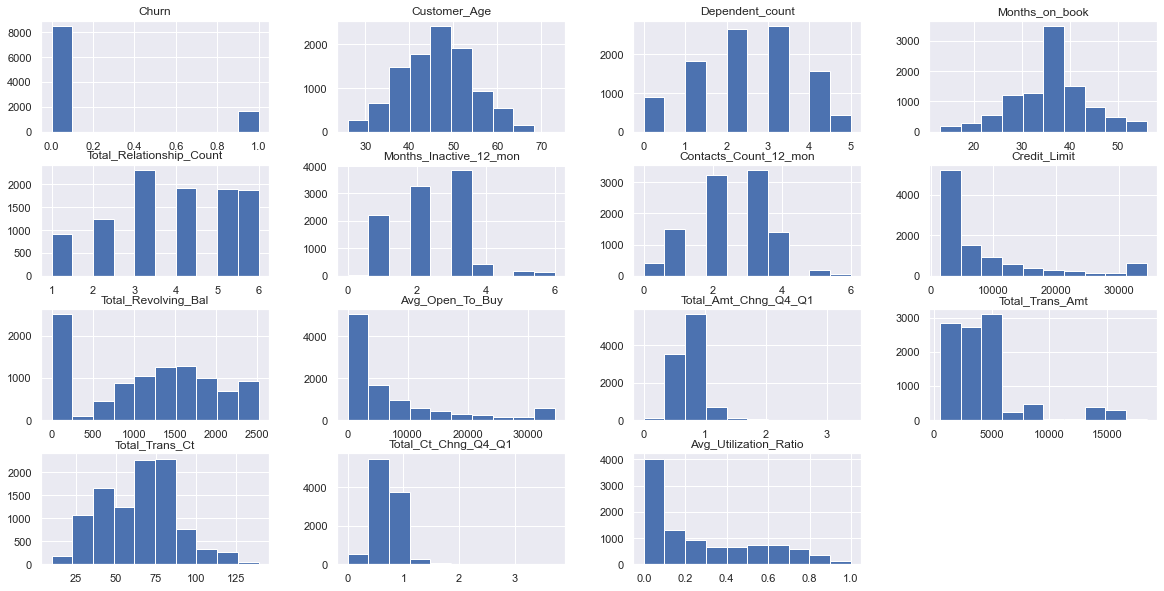

In [17]:
# A quick look of the ditribution of the data
df.hist(figsize=(20,10))
plt.show()

**Observation**
* Columns with **continuous** values:
    * Customer_Age
    * Months_on_book
    * Credit_Limit
    * Total_Revolving_Bal
    * Avg_Open_To_Buy
    * Total_Amt_Chng_Q4_Q1
    * Total_Trans_Amt
    * Total_Trans_Ct
    * Total_Ct_Chng_Q4_Q1
    * Avg_Utilization_Ratio
    
* Columns with **discrete** values:
    * Dependent_count
    * Total_Relationship_Count
    * Months_Inactive_12_mon
    * Contacts_Count_12_mon
    
    

#### Check their distribution and outliners

In [76]:
# define a function 

def plot(df, column):
    """ Function to visualize histogram and box plot for numeric variables"""
    plt.figure(figsize=(13, 4))
    
    plt.subplot(1,2,1)
    df[column].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(column)
    
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')
    
    plt.show()

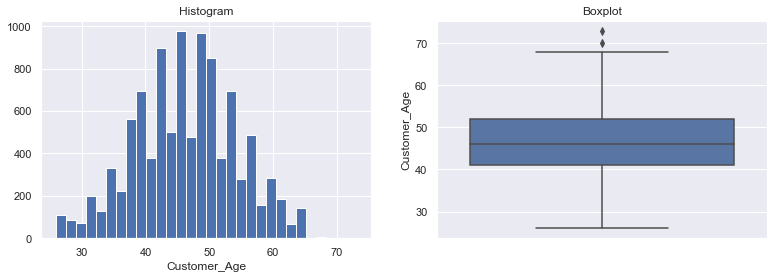

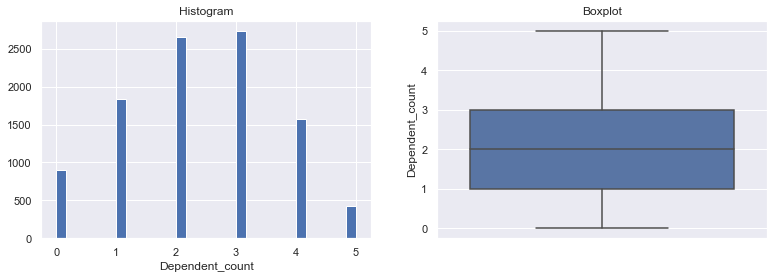

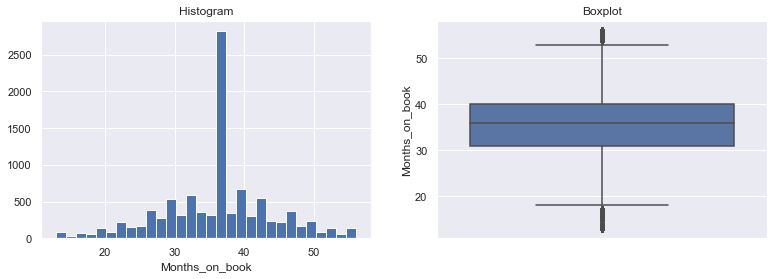

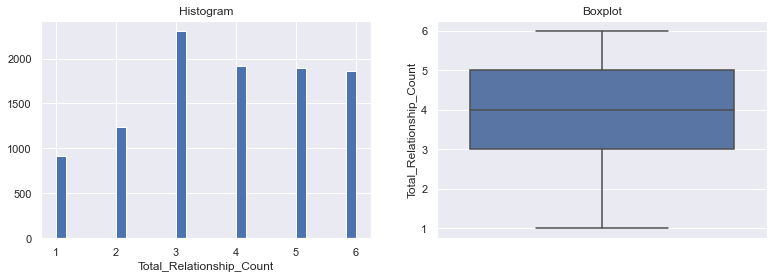

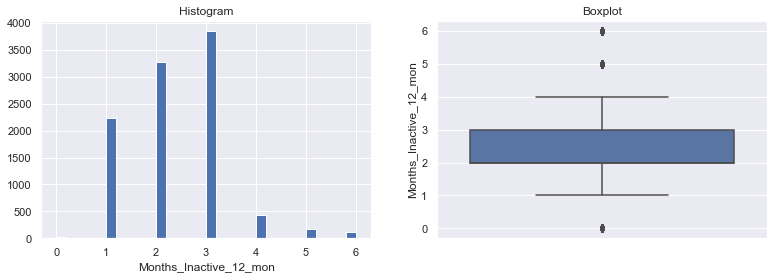

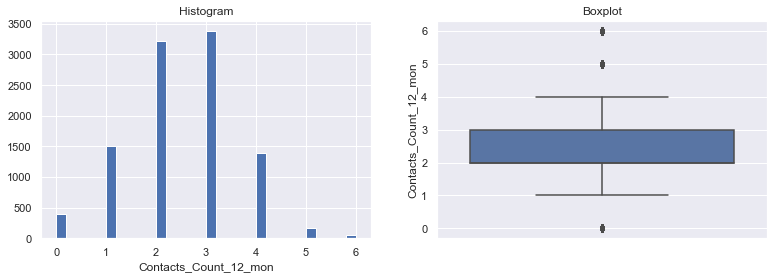

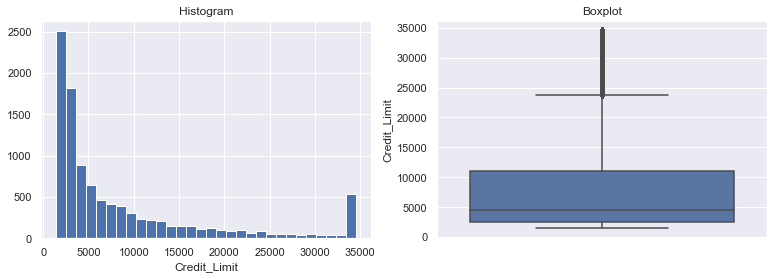

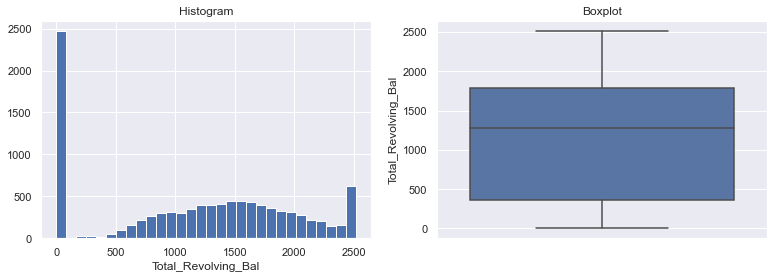

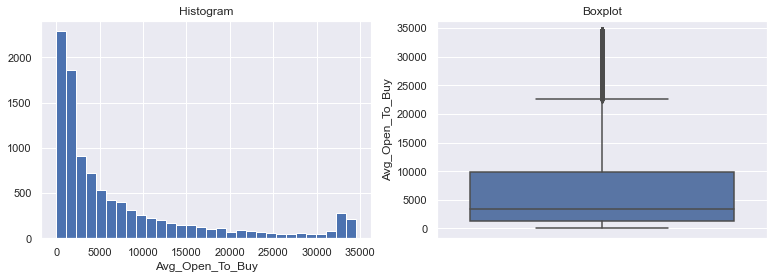

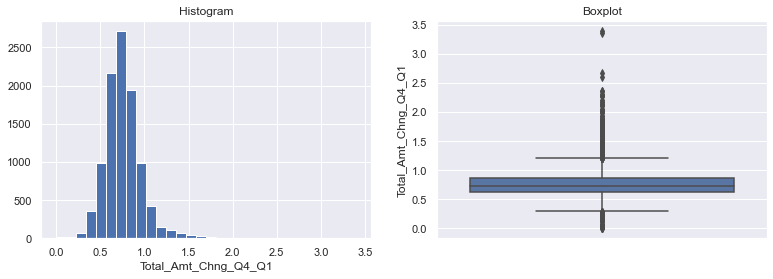

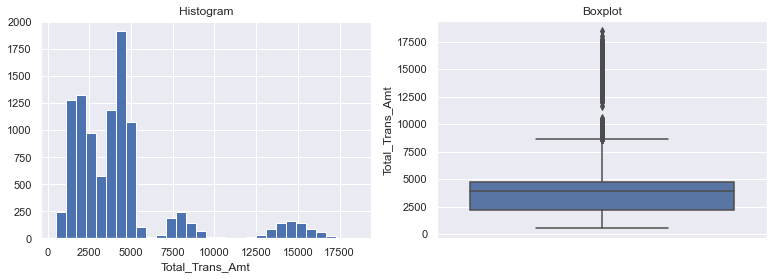

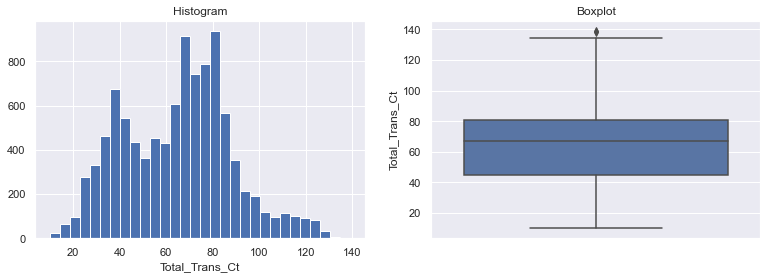

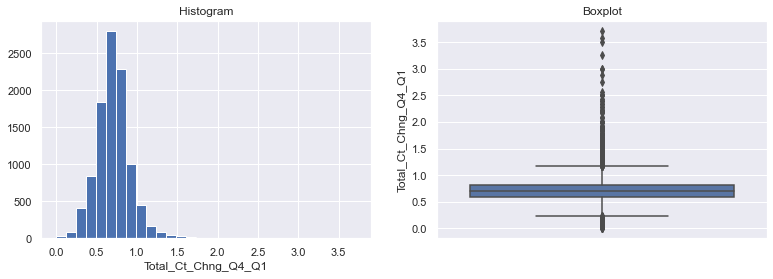

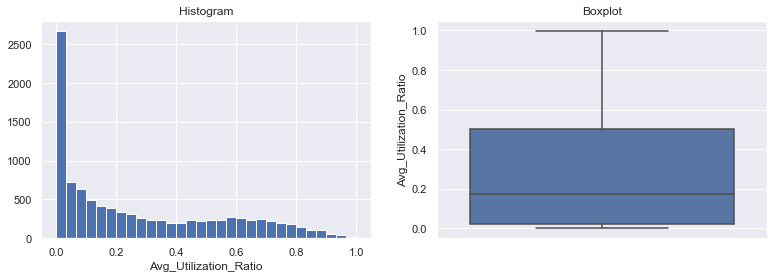

In [77]:
for col in df.select_dtypes(exclude=[np.object]).columns:
    if col != 'Churn':
        plot(df,col)
    

**Observation**:
* Customer Age has a normal distribution.
* Months on book also has a normal distribution with an extreme value.
* Columns that have a lot of outliers:
    * credit limit
    * avg open to buy
    * total amt chng q4 q1
    * total trans amt
    * total ct chng q4 q1

### Let's see if churned and existing customers behave differently

#### Plot distrubution for columns with continous values

In [85]:
# get columns with continous value¶
continous = 'Customer_Age Months_on_book Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio'
continous = continous.split()
continous

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [83]:
def plot_dis(df,column):
    
    plt.figure(figsize=(16, 4))
    sns.displot(data=df, x=df[column], hue="Churn", kind="kde")


<Figure size 1152x288 with 0 Axes>

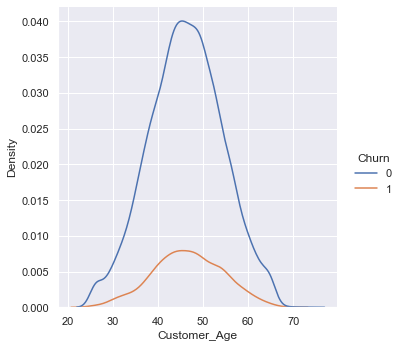

<Figure size 1152x288 with 0 Axes>

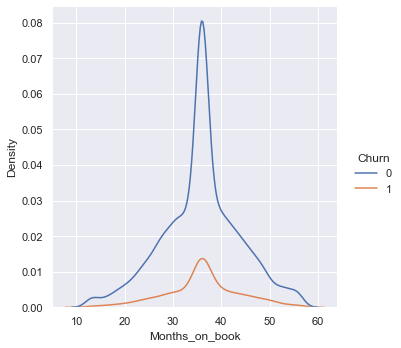

<Figure size 1152x288 with 0 Axes>

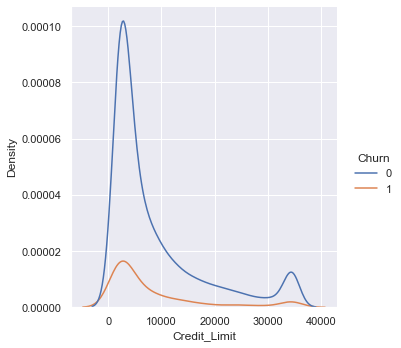

<Figure size 1152x288 with 0 Axes>

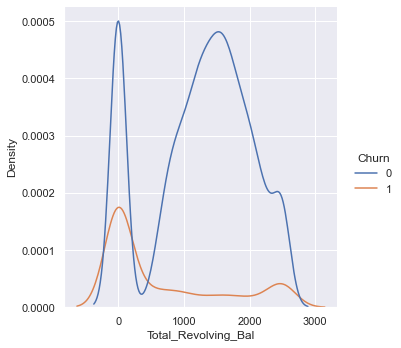

<Figure size 1152x288 with 0 Axes>

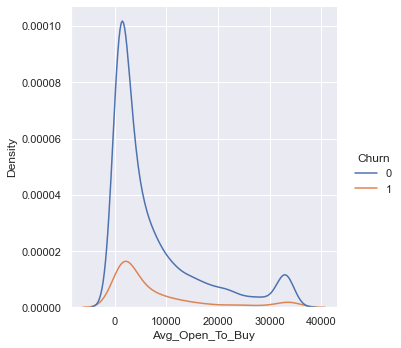

<Figure size 1152x288 with 0 Axes>

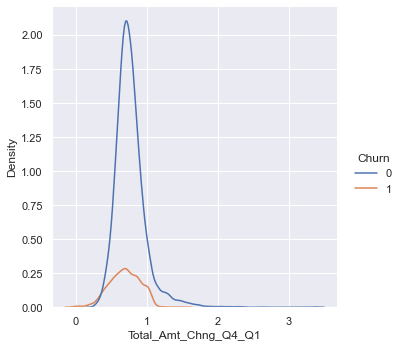

<Figure size 1152x288 with 0 Axes>

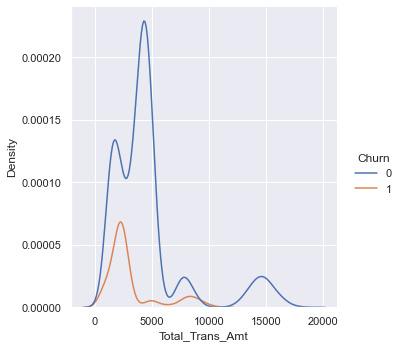

<Figure size 1152x288 with 0 Axes>

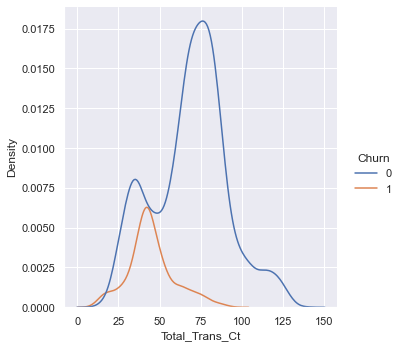

<Figure size 1152x288 with 0 Axes>

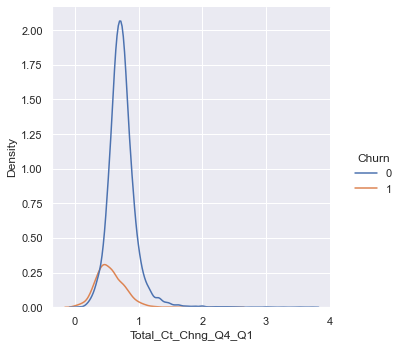

<Figure size 1152x288 with 0 Axes>

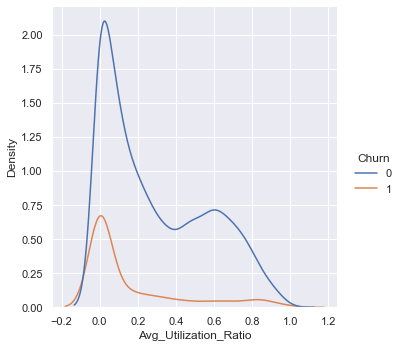

In [84]:
for col in continous:
    plot_dis(df,col)

**Observation**:

For most columns, churned and existing customers show similar distribution, except for Total_revolving_bal, Total_Trans_ct, Total_trans_amt, and Avg_utilization_ratio.

#### Plot for columns with discrete values

In [87]:
# get columns with discrete values
discrete = 'Dependent_count Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon'
discrete = discrete.split()
discrete

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [86]:
def plotdis(df,column):
    plt.figure(figsize=(16, 4))
    sns.displot(data=df, x=df[column], hue="Churn", multiple="stack")

<Figure size 1152x288 with 0 Axes>

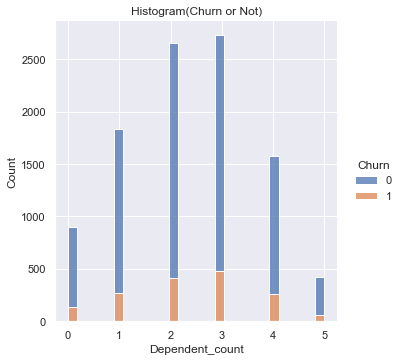

<Figure size 1152x288 with 0 Axes>

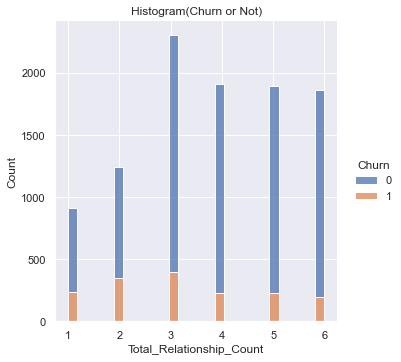

<Figure size 1152x288 with 0 Axes>

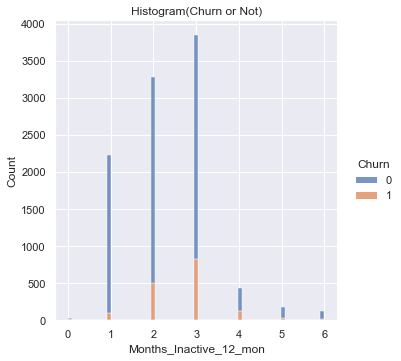

<Figure size 1152x288 with 0 Axes>

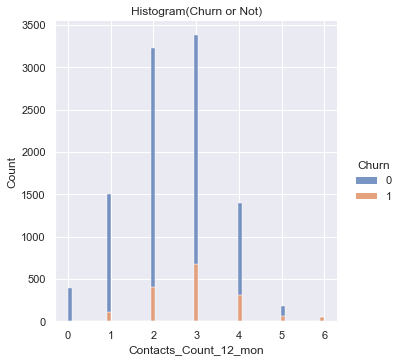

In [88]:
for col in discrete:
    if col != 'Churn':
        plothue(df,col)

### Pairplot

Use pair plot to understand the relationship between variables.

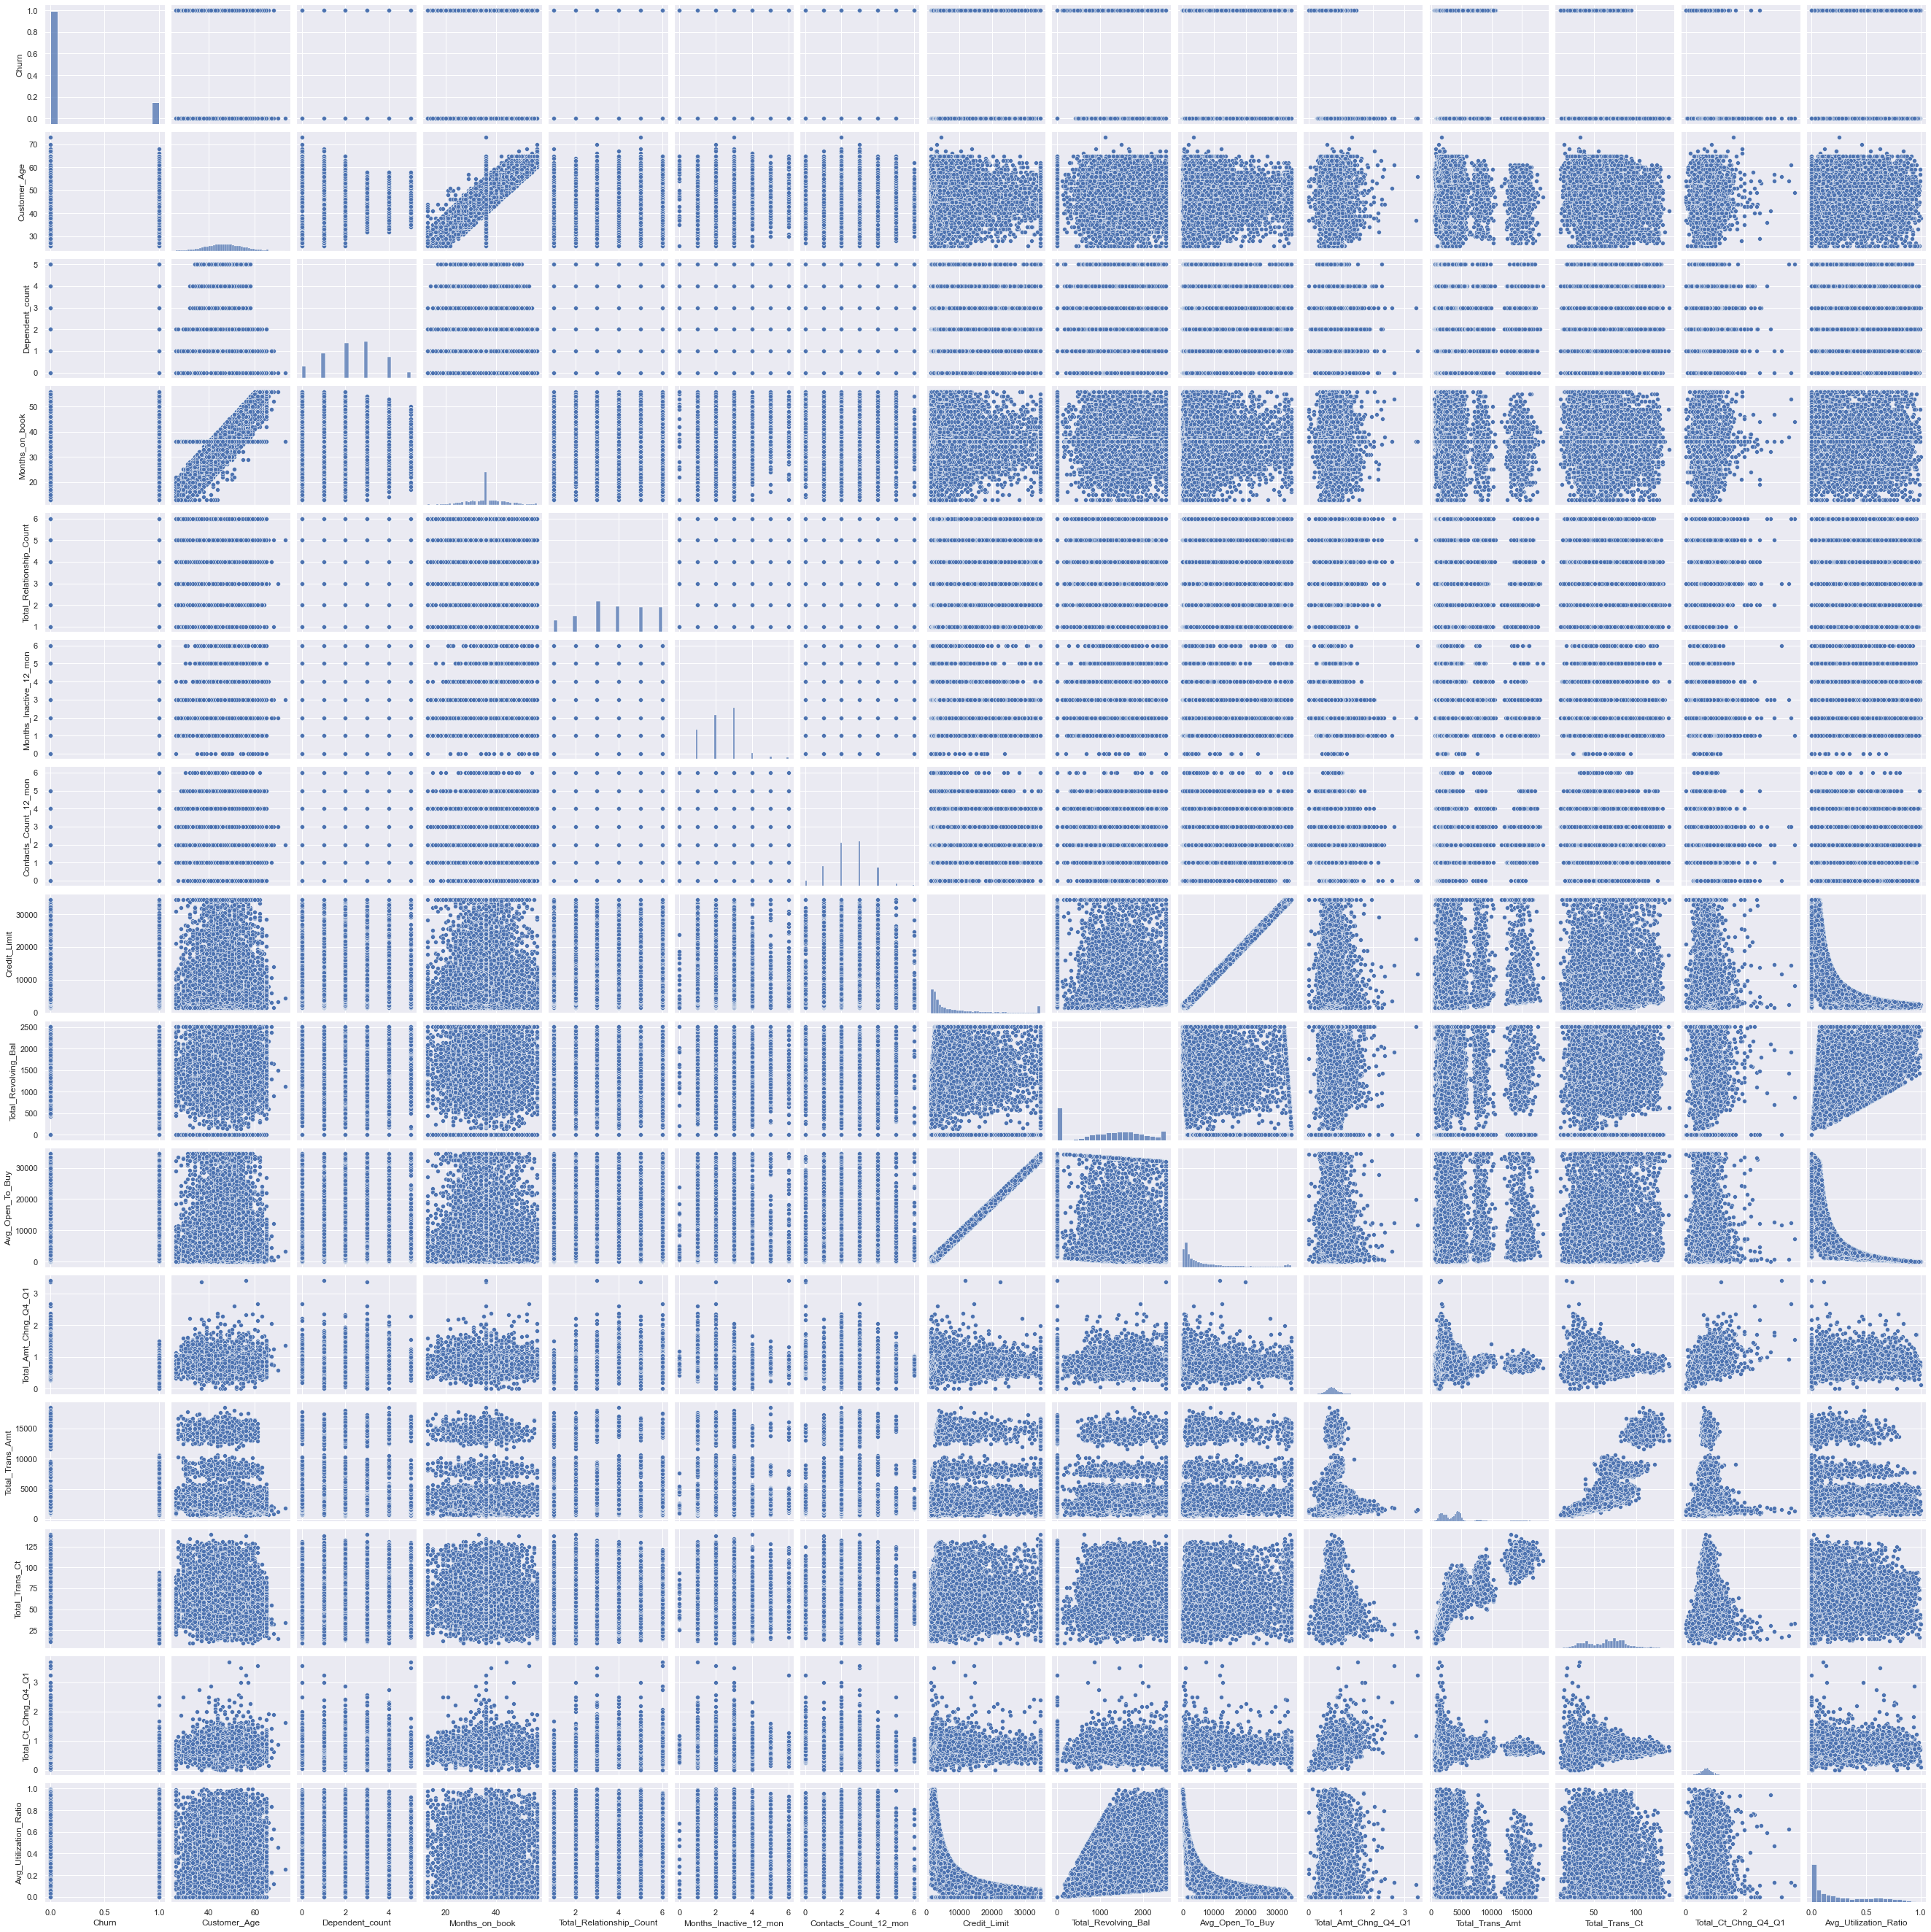

In [42]:
sns.pairplot(df)

### Correlation between numerical columns

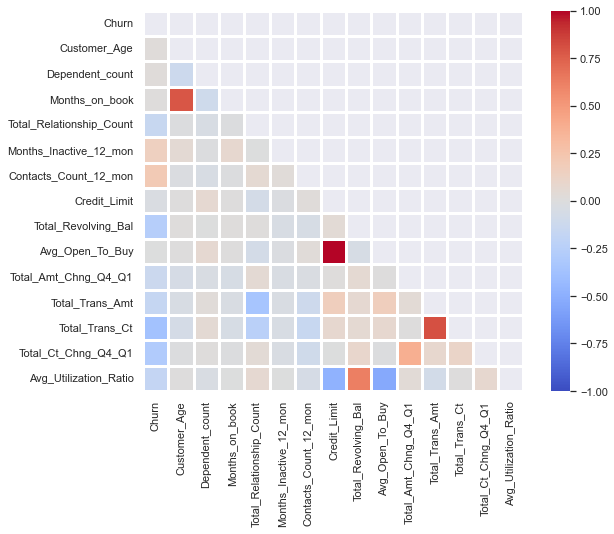

In [92]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, 
                center=0, square=True, linewidths=2.5)
plt.show()

**Observation:**

* Columns that are highly positively correlated:
    * Months_on_book & Customer_Age
    * Avg_Open_To_Buy & Credit_Limit
    * Total_Trans_Ct & Total_Trans_Amt
* Columns that are hightly nagatively correlated:
    * Credit_limit & Avg_Utilization_Ratio
    * Avg_Open_To_Buy & Avg_Utilization_Ratio

# Conclusion

We have explored the target and features of this dataset. We looked at the distrubution of different features, whether churned and existing customers behave differently on each feature, and their correlations. 

We don't have missing values, but the dataset is imbalanced. And we have some categorical columns. 

Therefore, in the next notebook, we will perform encoding, oversampling and normalization to prepare our data for Machine Learning model training. 